In [1]:
cd /content/drive/MyDrive/SOAI/Assignments/s8

/content/drive/MyDrive/SOAI/Assignments/s8


In [2]:



from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from utils import *
# from dataloader import Cifar10DataLoader

In [3]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
#list of 50,000 images each with dimension 3x32x32
imgs = [item[0] for item in cifar_trainset] # item[0] and item[1] are image and its label
#stacking all 50k images along 4th dimension , shape will be 3 x 32 x 32 x 50,000
imgs = torch.stack(imgs, dim=3)

#calculating mean over each channel, img.view will convert images into 3 x (32x32x50000) ie 3 x 5120000
print(imgs.view(3,-1).mean(dim=1))


print(imgs.view(3, -1).std(dim=1))

Files already downloaded and verified
tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [5]:


torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                    transform=transforms.Compose([
                                      transforms.RandomHorizontalFlip(p=.5), # FLips the image w.r.t horizontal axis
                                      transforms.RandomCrop(32,padding=4),     #Rotates the image to a specified angel
                                    #   transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
                                    #   transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Set the color params
                        transforms.ToTensor(),
                        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Files already downloaded and verified


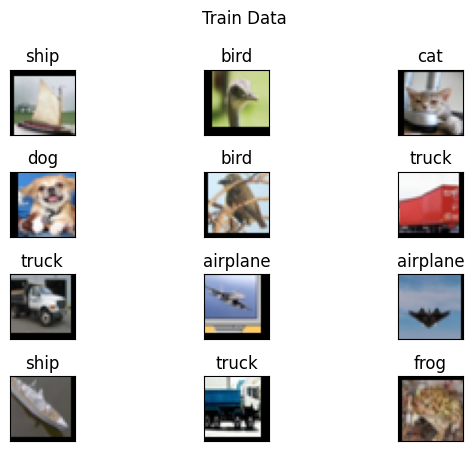

In [6]:
visualize_data(train_loader, 12, "Train Data", classes=cifar_trainset.classes)

In [8]:
from model import Net, model_train, model_test, model_summary, Model_cifar_ln


In [9]:


model = Model_cifar_gn().to(device)
model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
         GroupNorm-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1, 16,

In [10]:
from torch.optim.lr_scheduler import StepLR
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

for epoch in range(1, 21):
    print(f"epoch {epoch}")
    model_train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    model_test(model, device, test_loader)

epoch 1


Train: Loss=1.7331 Batch_id=390 Accuracy=25.23: 100%|██████████| 391/391 [02:30<00:00,  2.61it/s]



Test set: Average loss: 1.7242, Accuracy: 3493/10000 (34.93%)

epoch 2


Train: Loss=1.5803 Batch_id=390 Accuracy=39.79: 100%|██████████| 391/391 [02:32<00:00,  2.57it/s]



Test set: Average loss: 1.5475, Accuracy: 4307/10000 (43.07%)

epoch 3


Train: Loss=1.3633 Batch_id=390 Accuracy=48.76: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]



Test set: Average loss: 1.4320, Accuracy: 4715/10000 (47.15%)

epoch 4


Train: Loss=1.1543 Batch_id=390 Accuracy=53.71: 100%|██████████| 391/391 [02:33<00:00,  2.55it/s]



Test set: Average loss: 1.1909, Accuracy: 5771/10000 (57.71%)

epoch 5


Train: Loss=1.0338 Batch_id=390 Accuracy=57.36: 100%|██████████| 391/391 [02:28<00:00,  2.63it/s]



Test set: Average loss: 1.2180, Accuracy: 5679/10000 (56.79%)

epoch 6


Train: Loss=1.0572 Batch_id=390 Accuracy=59.02: 100%|██████████| 391/391 [02:27<00:00,  2.65it/s]



Test set: Average loss: 1.1174, Accuracy: 5961/10000 (59.61%)

epoch 7


Train: Loss=1.1164 Batch_id=390 Accuracy=60.29: 100%|██████████| 391/391 [02:31<00:00,  2.58it/s]



Test set: Average loss: 1.0941, Accuracy: 6113/10000 (61.13%)

epoch 8


Train: Loss=1.0061 Batch_id=390 Accuracy=61.93: 100%|██████████| 391/391 [02:37<00:00,  2.49it/s]



Test set: Average loss: 1.0895, Accuracy: 6176/10000 (61.76%)

epoch 9


Train: Loss=1.0215 Batch_id=390 Accuracy=62.32: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]



Test set: Average loss: 1.0137, Accuracy: 6401/10000 (64.01%)

epoch 10


Train: Loss=1.0440 Batch_id=390 Accuracy=63.47: 100%|██████████| 391/391 [02:32<00:00,  2.56it/s]



Test set: Average loss: 0.9821, Accuracy: 6420/10000 (64.20%)

epoch 11


Train: Loss=0.7498 Batch_id=390 Accuracy=66.83: 100%|██████████| 391/391 [02:35<00:00,  2.52it/s]



Test set: Average loss: 0.9417, Accuracy: 6582/10000 (65.82%)

epoch 12


Train: Loss=0.6773 Batch_id=390 Accuracy=67.02: 100%|██████████| 391/391 [02:36<00:00,  2.49it/s]



Test set: Average loss: 0.9437, Accuracy: 6565/10000 (65.65%)

epoch 13


Train: Loss=1.1086 Batch_id=390 Accuracy=67.41: 100%|██████████| 391/391 [02:44<00:00,  2.37it/s]



Test set: Average loss: 0.9386, Accuracy: 6629/10000 (66.29%)

epoch 14


Train: Loss=1.0027 Batch_id=390 Accuracy=67.70: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]



Test set: Average loss: 0.9423, Accuracy: 6576/10000 (65.76%)

epoch 15


Train: Loss=0.9013 Batch_id=390 Accuracy=67.93: 100%|██████████| 391/391 [02:30<00:00,  2.60it/s]



Test set: Average loss: 0.9330, Accuracy: 6615/10000 (66.15%)

epoch 16


Train: Loss=1.1143 Batch_id=390 Accuracy=67.94: 100%|██████████| 391/391 [02:31<00:00,  2.58it/s]



Test set: Average loss: 0.9408, Accuracy: 6612/10000 (66.12%)

epoch 17


Train: Loss=0.7414 Batch_id=390 Accuracy=68.00: 100%|██████████| 391/391 [02:29<00:00,  2.62it/s]



Test set: Average loss: 0.9239, Accuracy: 6657/10000 (66.57%)

epoch 18


Train: Loss=0.8861 Batch_id=390 Accuracy=68.16: 100%|██████████| 391/391 [02:31<00:00,  2.58it/s]



Test set: Average loss: 0.9420, Accuracy: 6621/10000 (66.21%)

epoch 19


Train: Loss=0.8515 Batch_id=390 Accuracy=68.29: 100%|██████████| 391/391 [02:27<00:00,  2.65it/s]



Test set: Average loss: 0.9213, Accuracy: 6669/10000 (66.69%)

epoch 20


Train: Loss=1.0310 Batch_id=390 Accuracy=68.36: 100%|██████████| 391/391 [02:28<00:00,  2.64it/s]



Test set: Average loss: 0.9306, Accuracy: 6671/10000 (66.71%)



In [11]:
misclassified_images, predictions, labels = get_misclassified_images(model,device,test_loader)

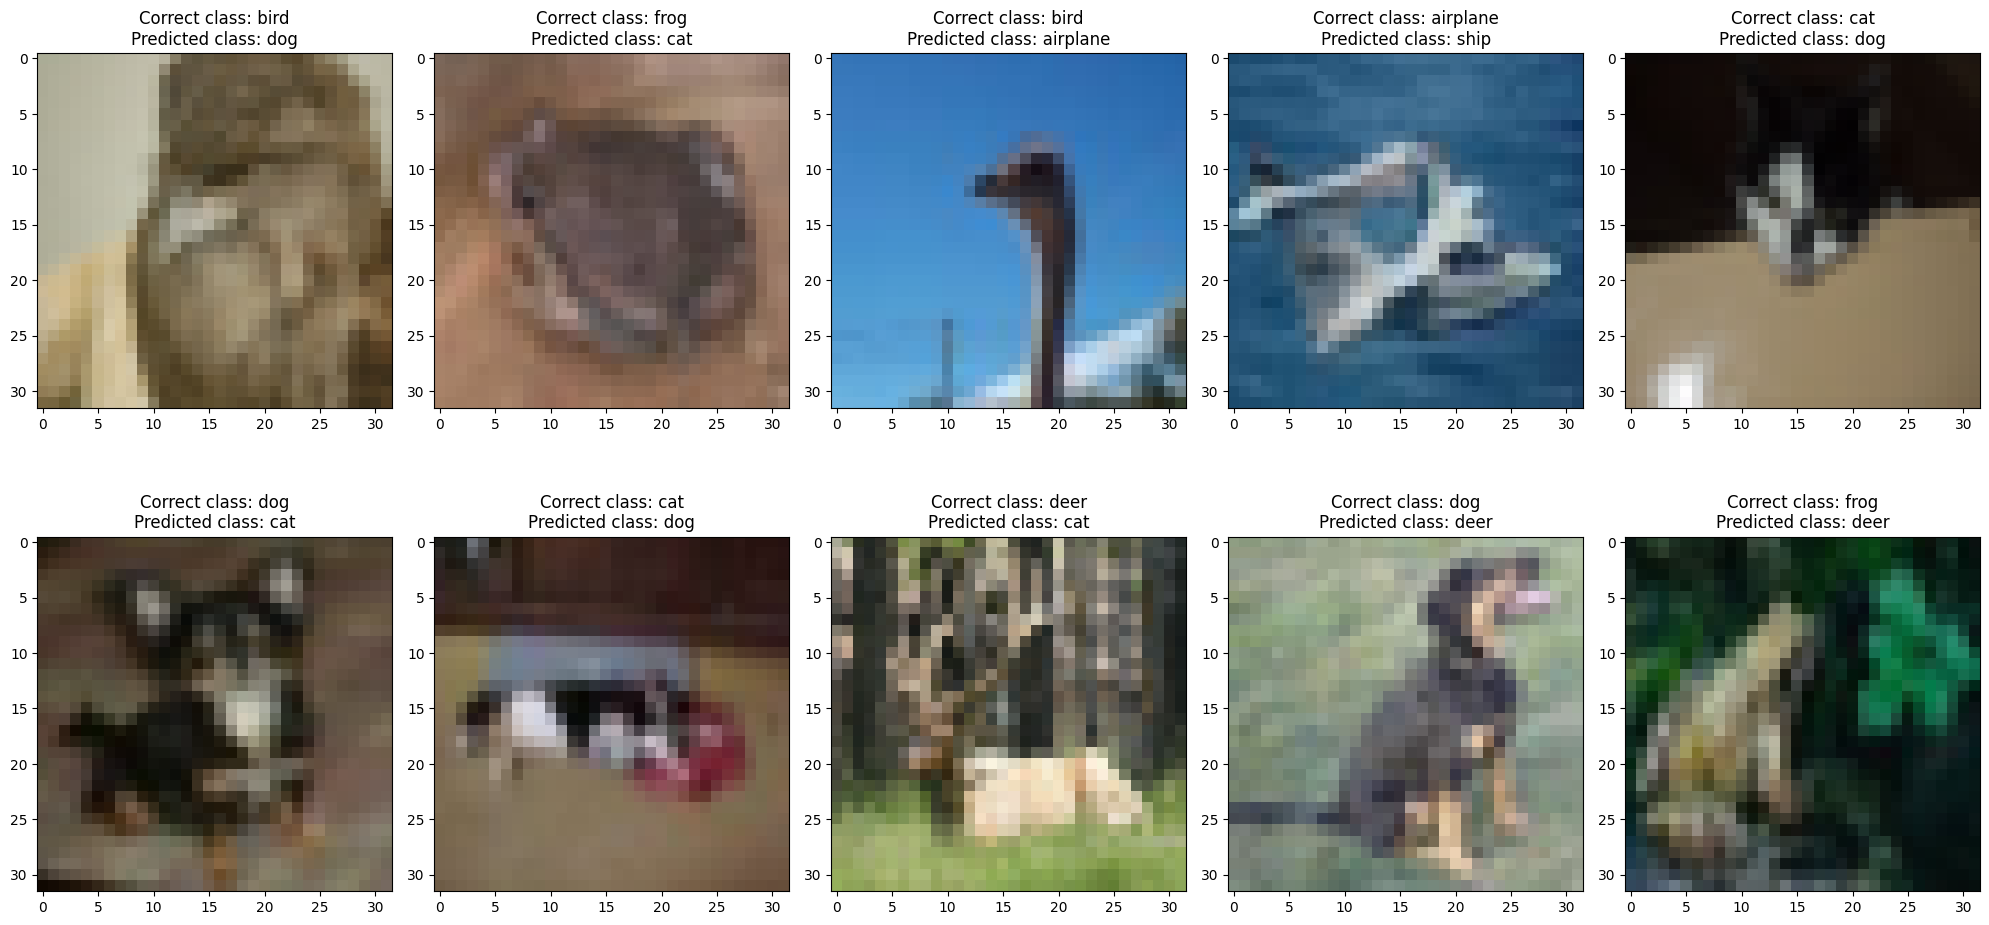

In [12]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    cifar_trainset.classes,
)